In [3]:
import pandas as pd
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch
from torch.nn.functional import pad


In [4]:
input_path = "/hpf/largeprojects/ccmbio/monikas/chem/feature_extraction/Ames_smi/Ames.csv"

def get_data():
    df = pd.read_csv(input_path)
    print(f"Len: {len(df)}")
    return df

df = get_data()
labels = np.arange(1, len(df)+1)
labels

Len: 6512


array([   1,    2,    3, ..., 6510, 6511, 6512])

# UMAP

Flat: tensor([[-1.0401,  1.0749, -1.6281, -0.1463,  0.3093, -1.6761],
        [-0.5649, -0.1515, -1.6004,  0.7598, -0.3099, -0.0991],
        [ 0.5525, -0.6557, -0.9549, -0.0275, -0.5118,  0.6737],
        [ 0.7491, -0.1775, -1.5635,  0.5228,  0.8556,  0.2613],
        [-0.4513,  0.2729,  1.8940,  0.2479,  0.6269,  0.5158],
        [ 1.2823,  1.7268,  0.4367,  0.0474,  1.2429,  0.1918],
        [ 0.1282,  0.8251, -0.9512, -0.6471,  1.5969, -1.7862],
        [-0.0794,  0.8660,  0.0463, -1.9675,  0.7859,  1.0566],
        [-1.2420,  0.0127, -0.4047, -0.3334, -0.5522,  1.1341],
        [-0.0370,  0.6308,  1.3984, -2.1438,  2.1193, -0.2340]])
Labels: [0 1 2 3 4 5 6 7 8 9]


/hpf/largeprojects/ccmbio/monikas/environments/conda_envs/vscode-env/lib/python3.12/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Embeddings: [[-10.280599    8.969608 ]
 [-11.324689    8.9633   ]
 [-11.686153    8.177332 ]
 [-10.845416    8.30971  ]
 [-10.780215    6.960305 ]
 [-10.007191    7.433285 ]
 [ -9.748357    8.352949 ]
 [-10.077088    6.65396  ]
 [-11.596234    7.46824  ]
 [ -9.321243    7.1547246]]


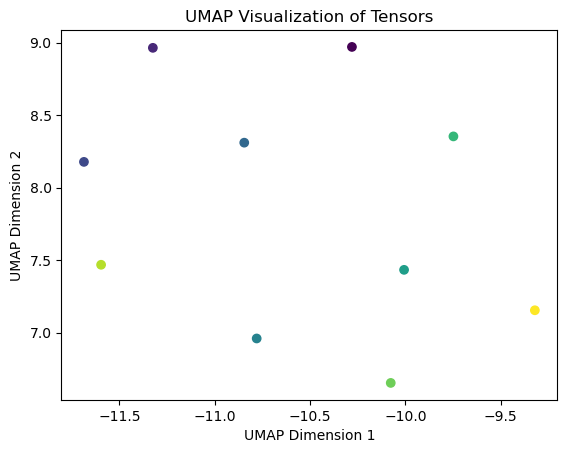

In [5]:
num_labels = 10
num_samples_per_label = 1
tensors = [torch.randn(1, 3, 2) for _ in range(num_labels)]  
# tensor2 = [torch.randn(1, 4, 2) for _ in range(5)]

# print(f"Tensors: {tensors}")

# tensors = tensor1 + tensor2
# Flatten the tensors and concatenate them into a single tensor
#flattening each tensor in the list
flattened_tensors = [t.view(t.size(0), -1) for t in tensors] #yields a list of 2D tensors
flat_data = torch.cat(flattened_tensors, dim=0)

print(f"Flat: {flat_data}")

# Convert the tensors to numpy arrays
data = flat_data.numpy()

labels = np.repeat(np.arange(num_labels), num_samples_per_label)
print(f"Labels: {labels}")
labels = labels.astype(int)


# Normalize the data
# scaler = StandardScaler()
# X = scaler.fit_transform(data)

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)
print(f"Embeddings: {embedding}")

# Plot the embedded data points
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels)
plt.title('UMAP Visualization of Tensors')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

## Flattening

Flattened: [tensor([[ 0.5362,  1.2735, -0.0897,  0.1724, -0.7938, -1.1678,  1.5047, -0.1680,
         -0.2165,  1.8059]]), tensor([[-1.3088, -0.3415, -1.6617, -0.1775,  0.2283, -1.0073, -0.5808, -0.5164,
         -1.7739, -0.5481, -0.5320,  1.5658, -0.0919,  0.2852, -0.0310]]), tensor([[ 0.1184,  0.2321, -0.6644,  0.0398, -0.2923,  0.5169,  1.2213, -1.4933,
         -1.6028,  1.5826,  0.3399,  0.0625, -0.1632,  1.4317,  1.1531,  0.4555,
          0.6025,  0.2695,  0.6858,  0.1672]]), tensor([[-0.2763, -0.2090,  0.9086,  1.1080,  0.1637, -1.0382, -0.3440,  1.1359,
         -0.6983, -1.3125]]), tensor([[-0.7812, -1.2600,  0.5212, -0.9748,  1.0137,  0.6195,  1.8026, -0.3744,
          0.2830, -0.3779,  0.9668, -1.6546, -1.1852,  1.3504,  0.3275]]), tensor([[-0.8490,  0.0729,  1.4349, -0.1052,  0.9705,  1.1681, -1.0945,  0.1145,
          1.9018,  0.3854,  1.0645,  1.0578,  0.0323, -0.2096,  0.8076,  0.2757,
          1.0146,  0.3995,  1.1581, -0.7853]])]
Concatenated: tensor([[ 0.5362,  1

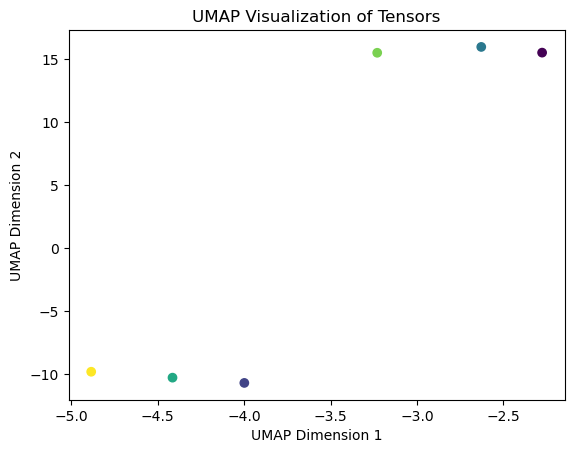

In [7]:
arr1 = torch.randn(1, 2, 5)
arr2 = torch.randn(1, 3, 5)
arr3 = torch.randn(1, 4, 5)
arr4 = torch.randn(1, 2, 5)
arr5 = torch.randn(1, 3, 5)
arr6 = torch.randn(1, 4, 5)


tensors = [arr1, arr2, arr3, arr4, arr5, arr6]

# print(f"Arr: {arr}")

flattened = [item.view(item.size(0), -1) for item in tensors]
print(f"Flattened: {flattened}")
# print("Tensors \n", tensors, "\n", tensors[0].ndim, tensors[1].shape)

# Determine the maximum number of features
max_features = max(tensor.size(1) for tensor in flattened)
# Pad tensors to have the same number of features
padded_tensors = [pad(tensor, (0, max_features - tensor.size(1))) for tensor in flattened]

#Concatenate
concat = torch.cat(padded_tensors, dim = 0)
print(f"Concatenated: {concat}")


data = concat.numpy()
print(f"Numpy data: {data}")

# labels = np.concatenate([
#     np.full(tensor.size(0), i) for i, tensor in enumerate(flattened)
# ])
labels = np.repeat(np.arange(6), 1)
print(f"Labels: {labels}")
labels = labels.astype(int)

# Apply UMAP for dimensionality reduction
# reducer = umap.UMAP(n_neighbors=2, n_components=2, metric='euclidean', densmap=True, low_memory=False)
reducer = umap.UMAP(n_neighbors=2, n_components=2, metric='euclidean')
embedding = reducer.fit_transform(data)
print(f"Embeddings: {embedding}")

# Plot the embedded data points
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels)
plt.title('UMAP Visualization of Tensors')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

## Panda Series on scatter plot